In [2]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [3]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [4]:
import pandas as pd

In [5]:
# importing the pandas library
import pandas as pd

# reading the csv file
df = pd.read_csv('IMDB_Dataset.csv')

# updating the column value/data
df['sentiment'] = df['sentiment'].replace({'negative': 0})

# writing into the file
df.to_csv('IMDB_Dataset.csv', index=False)

print(df)


                                                  review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]


In [6]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('IMDB_Dataset.csv')
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-imdb.csv', index=False)
test.to_csv('test-imdb.csv', index=False)

In [7]:
train_df = pd.read_csv("train-imdb.csv", encoding='unicode_escape', header=0)

In [8]:
train_df

,review,sentiment
0,I love this show. Period. I haven't been watch...,1
1,Dreamland started out moderately interesting b...,0
2,I came across this movie in an Australian hote...,1
3,WWE was in need of a saviour as Wrestlemania 1...,1
4,"Perhaps it's just me, but this movie seemed mo...",0
...,...,...
44995,Here's another of the 1940's westerns that I w...,1
44996,This movie has become an iconic stand-in for w...,1
44997,The over-riding problem with this film is that...,0
44998,"This film, with only two characters, takes you...",1


In [9]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_19724\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


1

In [10]:
test_df = pd.read_csv("test-imdb.csv", encoding='unicode_escape', header=0)

In [11]:
test_df.shape

(5000, 2)

In [12]:
test_df.head()

,review,sentiment
0,I sure would like to see a resurrection of a u...,1
1,My first exposure to the Templarios & not a go...,0
2,One of the most significant quotes from the en...,1
3,"Of all the films I have seen, this one, The Ra...",0
4,"This movie struck home for me. Being 29, I rem...",1


In [13]:
train_df['sentiment'] = (train_df['sentiment']==1).astype(int)
test_df['sentiment'] = (test_df['sentiment']==1).astype(int)

train_df.head(30)

,review,sentiment
0,I love this show. Period. I haven't been watch...,1
1,Dreamland started out moderately interesting b...,0
2,I came across this movie in an Australian hote...,1
3,WWE was in need of a saviour as Wrestlemania 1...,1
4,"Perhaps it's just me, but this movie seemed mo...",0
5,This movie which was released directly on vide...,0
6,Sad story of a downed B-17 pilot. Brady is sho...,1
7,"I love camp movies, believe me and the usual t...",0
8,Absolutely fantastic! Whatever I say wouldn't ...,1
9,Kennedy-Miller could hardly have done a better...,1


In [14]:
test_df.head()

,review,sentiment
0,I sure would like to see a resurrection of a u...,1
1,My first exposure to the Templarios & not a go...,0
2,One of the most significant quotes from the en...,1
3,"Of all the films I have seen, this one, The Ra...",0
4,"This movie struck home for me. Being 29, I rem...",1


In [15]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,I love this show. Period. I haven't been watch...
1,1,0,Dreamland started out moderately interesting b...
2,2,1,I came across this movie in an Australian hote...
3,3,1,WWE was in need of a saviour as Wrestlemania 1...
4,4,0,"Perhaps it's just me, but this movie seemed mo..."


In [16]:
train_df_bert

,id,label,sentence
0,0,1,I love this show. Period. I haven't been watch...
1,1,0,Dreamland started out moderately interesting b...
2,2,1,I came across this movie in an Australian hote...
3,3,1,WWE was in need of a saviour as Wrestlemania 1...
4,4,0,"Perhaps it's just me, but this movie seemed mo..."
...,...,...,...
44995,44995,1,Here's another of the 1940's westerns that I w...
44996,44996,1,This movie has become an iconic stand-in for w...
44997,44997,0,The over-riding problem with this film is that...
44998,44998,1,"This film, with only two characters, takes you..."


In [17]:
train_df_bert = train_df_bert.iloc[0:10000]

In [18]:
train_df_bert

,id,label,sentence
0,0,1,I love this show. Period. I haven't been watch...
1,1,0,Dreamland started out moderately interesting b...
2,2,1,I came across this movie in an Australian hote...
3,3,1,WWE was in need of a saviour as Wrestlemania 1...
4,4,0,"Perhaps it's just me, but this movie seemed mo..."
...,...,...,...
9995,9995,0,I'm a big fan of Patricia Hodge and Mariam Mar...
9996,9996,1,"We enjoy a film like ""Fame"" because we imagine..."
9997,9997,1,This movie just pulls you so deeply into the t...
9998,9998,0,What to say about this movie. Well it is about...


In [19]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,I sure would like to see a resurrection of a u...
1,1,0,My first exposure to the Templarios & not a go...
2,2,1,One of the most significant quotes from the en...
3,3,0,"Of all the films I have seen, this one, The Ra..."
4,4,1,"This movie struck home for me. Being 29, I rem..."


In [20]:
test_df_bert = test_df_bert.iloc[0:3000]

In [21]:
test_df_bert

,id,label,sentence
0,0,1,I sure would like to see a resurrection of a u...
1,1,0,My first exposure to the Templarios & not a go...
2,2,1,One of the most significant quotes from the en...
3,3,0,"Of all the films I have seen, this one, The Ra..."
4,4,1,"This movie struck home for me. Being 29, I rem..."
...,...,...,...
2995,2995,1,Gere and Danes star as 2 workers for the depar...
2996,2996,0,Well I'm probably about to be lambasted by eve...
2997,2997,0,This is a rip-off from Cellular. <br /><br />B...
2998,2998,0,"Every new fall line-up show deserves, at least..."


In [22]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [23]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [24]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [25]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  Dreamland started out moderately interesting but never went anywhere except Tedium city. A low rent affair with no name actors and laughable effects, not recommended for any reason. The best thing that could be said is it looks like they really filmed it on location in the Nevada desert. That's it, I can't think of one thing good besides that about this stinker. The finale is supposed to be some kind of revelation but falls flat like the rest. Oh, I thought of one other good point about this cheese, it clocks in at just over an hour although it still wears out its welcome long before then. When the girl starts walking around in the desert at night it seems to last forever and just keeps getting worse from there. The attempts at horror aren't effective in the least. The story is an attempt at a twilight zone style feel but fails badly. Check out "Retroactive" for a good science fiction B-movie.
Tokenized:  ['dream', '##land', 'started', 'out', 'moderately', 'interesting', 'b

In [26]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  229


In [27]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  204


In [28]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 300,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  I love this show. Period. I haven't been watching very long, probably only about six months or so, actually, but it is now my favorite show and probably will be for quite a while. I love all of the characters, except I don't really care for Donna. I'm not completely sure why. I just..don't find her funny, and I don't think Laura Prepon is a very good actress. Other than her, I find the rest of the cast pretty good. Kurtwood Smith and Debra Joe Rupp, who played Erics parents, were extremely funny. Topher Grace is also a great actor. Unlike a lot of fans, I did not completely hate the 8th season. I still watch it, and it does make me laugh. But, if you compare it to the shows earlier seasons, its..not good. Randy is horrible. The finale was decent, nothing amazing, but good. =] I do think it would have been better to cancel the show after Ashton and Topher decided to leave, but oh well. I have the fourth season on DVD, and someday I hope to have all eight seasons on DVD. Some 

In [29]:

train_df_bert.head()

,id,label,sentence
0,0,1,I love this show. Period. I haven't been watch...
1,1,0,Dreamland started out moderately interesting b...
2,2,1,I came across this movie in an Australian hote...
3,3,1,WWE was in need of a saviour as Wrestlemania 1...
4,4,0,"Perhaps it's just me, but this movie seemed mo..."


In [30]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [32]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (3000, 60)


In [33]:
#FuzzyCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            5152      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 3

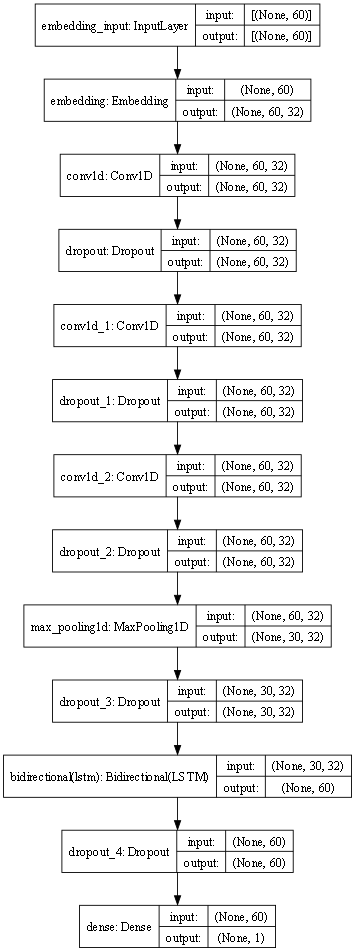

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [35]:
import keras
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 17s 13ms/step - loss: 0.5103 - accuracy: 0.7267 - val_loss: 0.4611 - val_accuracy: 0.7850
Epoch 2/20
900/900 [==============================] - 10s 12ms/step - loss: 0.3515 - accuracy: 0.8477 - val_loss: 0.4252 - val_accuracy: 0.8030
Epoch 3/20
900/900 [==============================] - 10s 12ms/step - loss: 0.2845 - accuracy: 0.8839 - val_loss: 0.4955 - val_accuracy: 0.7670
Epoch 4/20
900/900 [==============================] - 10s 11ms/step - loss: 0.2268 - accuracy: 0.9114 - val_loss: 0.5494 - val_accuracy: 0.7810
Epoch 5/20
313/313 [==============================] - 3s 6ms/step - loss: 0.1468 - accuracy: 0.9538
Training Accuracy: 0.953800
Training Loss: 0.146750
94/94 [==============================] - 1s 7ms/step - loss: 0.5123 - accuracy: 0.8093
Testing Accuracy:  0.809333
Testing Loss:  0.512288


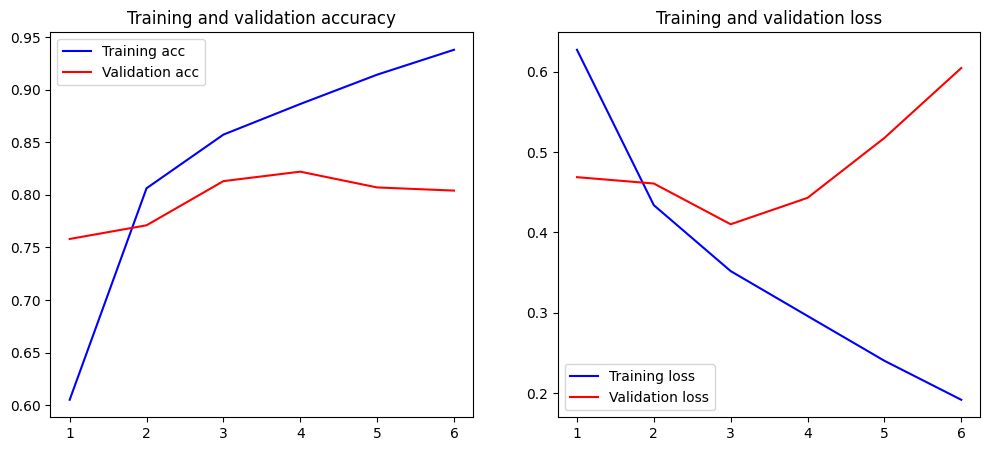

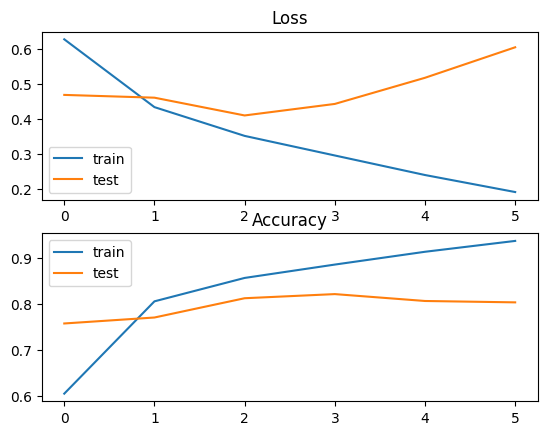

In [221]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [152]:
#NewCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 5000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 125
nb_classes = 3

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
#model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(FuzzyLayer(20, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=3))

#model.add(FuzzyLayer(10, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=1))

#model.add(FuzzyLayer(10, input_dim=2))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
#model.add(FuzzyLayer(10, input_dim=2))

#model.add(Flatten())
#model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(DefuzzyLayer(1))

#model.add(Dense(nb_classes))
#model.add(Activation('softmax'))
#model.add(Dense(1, activation='sigmoid'))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            160000    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 30, 32)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60)                15120     
_________________________________________________________________
dense_10 (Dense)             (None, 1)

In [149]:
# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/50
1000/1000 [==============================] - 16s 13ms/step - loss: 0.3485 - accuracy: 0.8528 - val_loss: 0.2182 - val_accuracy: 0.9203
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1685 - accuracy: 0.9306 - val_loss: 0.1174 - val_accuracy: 0.9537
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1220 - accuracy: 0.9467 - val_loss: 0.0877 - val_accuracy: 0.9590
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0891 - accuracy: 0.9591 - val_loss: 0.0747 - val_accuracy: 0.9643
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0699 - accuracy: 0.9636 - val_loss: 0.0562 - val_accuracy: 0.9683
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0682 - accuracy: 0.9638 - val_loss: 0.0522 - val_accuracy: 0.9713
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0584 - accuracy: 0.9657 - val_loss: 0.0529 -

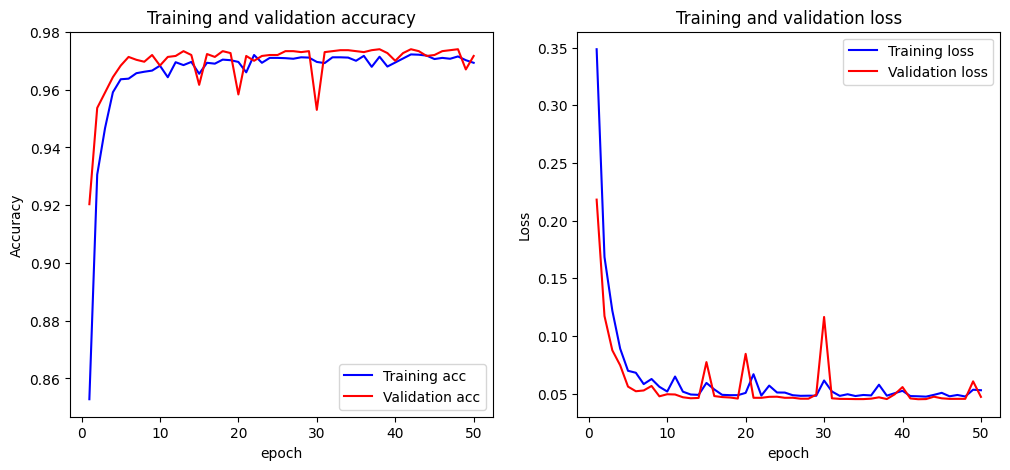

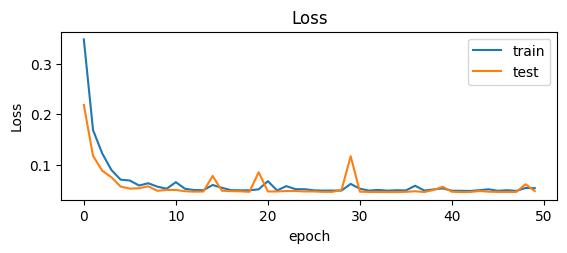

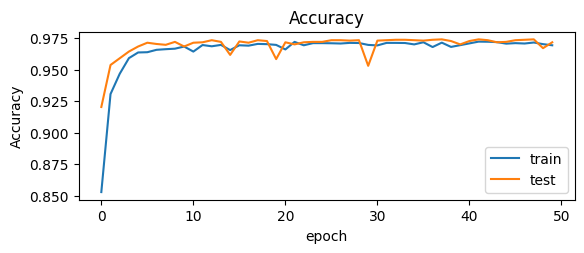

In [150]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [177]:
# 3 - CNNLSTM model design
print('Building model')

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
#model.add(FuzzyLayer(5, input_dim=2))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Building model


ValueError: Input 0 of layer conv1d_67 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 125)

In [77]:
history1 = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/20
1000/1000 [==============================] - 9s 7ms/step - loss: 0.3485 - accuracy: 0.8524 - val_loss: 0.1909 - val_accuracy: 0.9187
Epoch 2/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1571 - accuracy: 0.9321 - val_loss: 0.1119 - val_accuracy: 0.9503
Epoch 3/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0945 - accuracy: 0.9574 - val_loss: 0.0744 - val_accuracy: 0.9627
Epoch 4/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0833 - accuracy: 0.9585 - val_loss: 0.0713 - val_accuracy: 0.9633
Epoch 5/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0700 - accuracy: 0.9617 - val_loss: 0.0696 - val_accuracy: 0.9660
Epoch 6/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0678 - accuracy: 0.9654 - val_loss: 0.0538 - val_accuracy: 0.9707
Epoch 7/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0743 - accuracy: 0.9608 - val_loss: 0.0663 - val_accuracy:

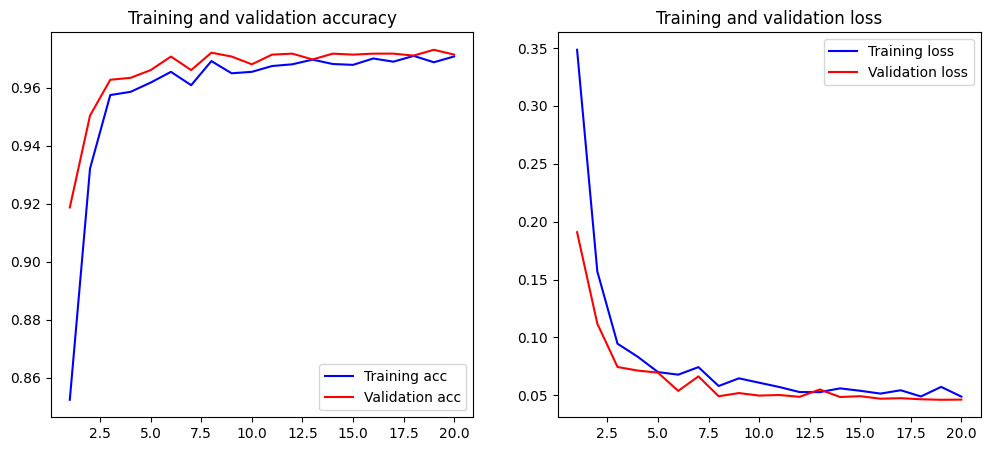

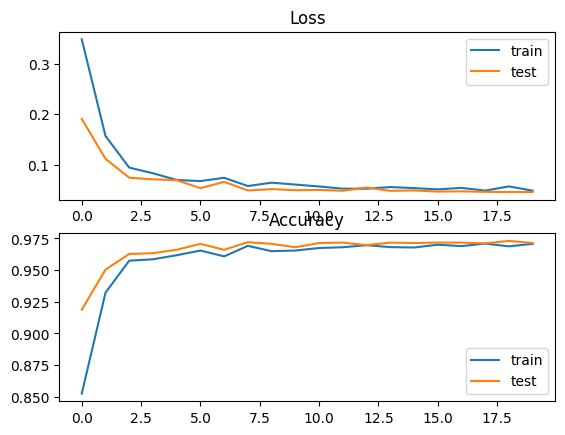

In [78]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [227]:
# number of neurons as number of Rule will be produce
n_neurons = 100

# number of features feed to fuzzy Inference Layer
n_feature = 9
from itertools import product
from keras import backend as K
import random
# to get all permutaion
fRules = list(product([-1.0,0.0,1.0], repeat=n_feature)) 

# based on article just 100 of them are needed
out_fRules = random.sample(fRules, n_neurons)

fRules_sigma = K.transpose(out_fRules)

In [228]:
import tensorflow as tf
class fuzzy_inference_block(tf.keras.layers.Layer):
    def __init__(self, output_dim, i_fmap, mu, sigma):

        self.output_dim = output_dim
        self.index = i_fmap
        self.mu = mu
        self.sigma = sigma

        super(fuzzy_inference_block, self).__init__()

    def build(self, input_shape):
        self.mu_map = fRules_sigma * self.mu
        self.sigma_map = tf.ones((n_feature, self.output_dim)) * self.sigma
        

        super().build(input_shape)

    def call(self, inputs):
        fMap = inputs[:,n_feature*(self.index):n_feature*(self.index+1)]
        # create variables for processing
        aligned_x = K.repeat_elements(K.expand_dims(fMap, axis=-1), self.output_dim, -1)
        aligned_c = self.mu_map
        aligned_s = self.sigma_map


        # calculate output of each neuron (fuzzy rule)
        phi = K.exp(-K.sum(K.square(aligned_x - aligned_c) / (2 * K.square(aligned_s)),
                           axis=-2, keepdims=False))
        return phi


In [239]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)


fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(fMaps)
fuzzy_inference = []
for i in tqdm(range(n_femap)):
    f_block = fuzzy_inference_block(output_dim=n_neurons, i_fmap=i, mu=mu, sigma=sigma)(drop_out)
    fuzzy_inference.append(f_block)
merged = concatenate(fuzzy_inference, axis=1)

dc=Dense(1,activation='sigmoid')(merged)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.50it/s]

Bi-LSTM NetWork
Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_95 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 embedding_96 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 dropout_125 (Dropout)          (None, 60, 32)       0           ['embedding_95[0][0]']           
                                                                           

In [240]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 9s 19ms/step - loss: 0.0000e+00 - accuracy: 0.6497 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accura

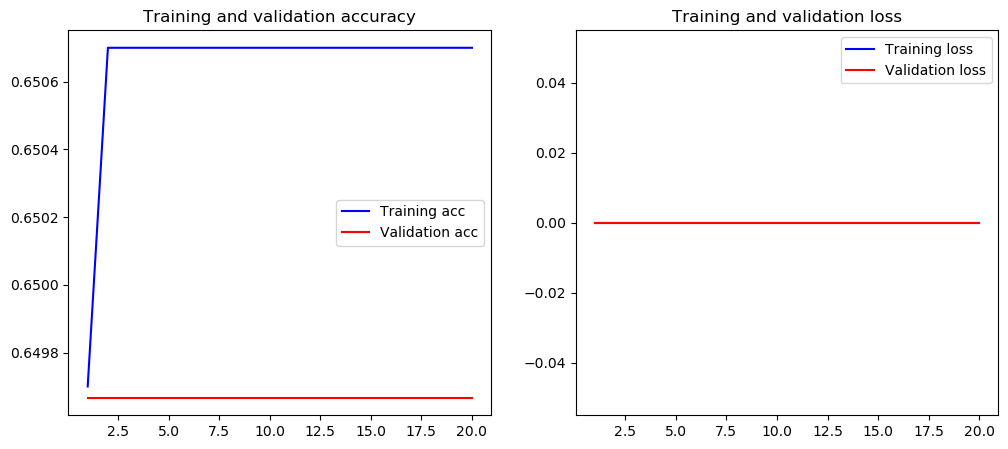

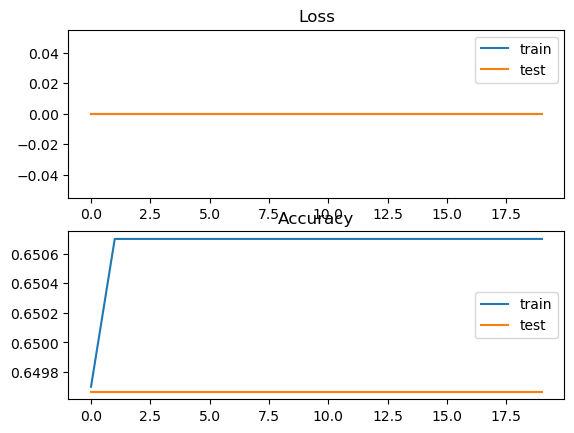

In [242]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [253]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)

#fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(bi_lstm)

dc=Dense(1,activation='sigmoid')(drop_out)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

Bi-LSTM NetWork
Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_108 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 embedding_109 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 dropout_143 (Dropout)          (None, 60, 32)       0           ['embedding_108[0][0]']          
                                                                           

In [254]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.6508 - val_loss: nan - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 8/20
313/313 [=====================

In [ ]:
from utils import *
import numpy as np
import random as rn
import tensorflow as tf
np.random.seed(42)
rn.seed(554521)
tf.set_random_seed(14452)
from keras.models import Model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Activation, Input, Average
from keras.models import load_model
from sklearn.metrics import classification_report
import matplotlib as plt

RUN_ENSAMBLE = True
MODEL_SAVE_FOLDER = "models"

def model_1():
    model = Sequential(name="MODEL1")
    model.add(Dense(18, activation = 'sigmoid', input_shape=(28,)))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['mae','acc'])
    return model

def model_2(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(27, activation = 'relu')(input)
    #x = Dense(7, activation = 'sigmoid')(x)
    x = Dropout(0.1)(x)
    output = Dense(output, activation = 'softmax')(x)
    model = Model(inputs=input, outputs=output, name="MODEL2")

    return model

def model_3(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(35, activation = 'tanh')(input)
    #x = Dense(10, activation = 'tanh')(x)
    x = Dropout(0.2)(x)
    output = Dense(output, activation = 'softmax')(x)

    model = Model(inputs=input, outputs=output, name="MODEL3")

    return model


def ensamble_model(input: int):
    models = get_models(MODEL_SAVE_FOLDER) 
    models = load_models(models)
    input = Input(shape=(input,))
    eModels =[model(input) for model in models] 
    averageLayer = Average()(eModels)   
    ensModel = Model (name="EnsambleModel", inputs=input, outputs=averageLayer) 

    return ensModel

if __name__ == "__main__":
    trainX,x_test, trainY, y_test = prepare_data('dwt.csv')
    output = len(np.unique(y_test))
    cv_trainX, cv_trainY = get_data_without_encoding('dwt.csv')
    # model_1 = model_1(trainX.shape[1], output)
    train_with_cross_validation(model_1,trainX, trainY,epochs=2)
    import pdb; pdb.set_trace()
    # model_1 = fit_model(model_1, trainX,trainY,epochs=2, k_fold=3)
    
    # model_2 = model_2(trainX.shape[1], output)
    # model_2 = fit_model(model_2, trainX,trainY, epochs=2,k_fold=3)
   
    # model_3 = model_3(trainX.shape[1], output)
    # model_3 = fit_model(model_3, trainX,trainY, epochs=2, k_fold=3)
   
    # print(evalute_model(model_1,trainX, trainY,RUN_ENSAMBLE))
    # print(evalute_model(model_1, x_test, y_test, RUN_ENSAMBLE))
    # T=model_1.predict(x_test)
    # pred = np.argmax(T, axis=1)
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_2, x_test, y_test, RUN_ENSAMBLE))
    # # print(evalute_model(model_2,trainX, trainY,RUN_ENSAMBLE))
    # T=model_2.predict(x_test)
    # pred = np.argmax(T, axis=1)
   
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_3, x_test, y_test, RUN_ENSAMBLE))
    # print(evalute_model(model_3,trainX, trainY,RUN_ENSAMBLE))
    # T=model_3.predict(x_test)
    # pred = np.argmax(T, axis=1)
    
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))
    

    save_model(model_1, path=MODEL_SAVE_FOLDER, filename=model_1.name)
    # # save_model(model_2, path=MODEL_SAVE_FOLDER, filename=model_2.name)
    # # save_model(model_3, path=MODEL_SAVE_FOLDER, filename=model_3.name)
    
    # RUN_ENSAMBLE = True
    # if(RUN_ENSAMBLE ==True):
    #     print("Running ensamble model")
    #     ensamble = ensamble_model(trainX.shape[1])
    #     ensamble.summary()
    #     print(evalute_model(ensamble, x_test, y_test, RUN_ENSAMBLE))
    #     pred=ensamble.predict(x_test)
    #     pred = np.argmax(pred, axis=1)
    #     Y_test = np.argmax(y_test, axis=1)
    #     cm =  confusion_matrix(Y_test, pred)
    #     np.set_printoptions(precision=2)
    #     print ("Confusion Matrix")
    #     print (cm)
    #     print(classification_report(Y_test, pred))